# The Ising model and phase transitions

### Remarks on completing the module


This assignment is summatively assessed.
It is imperative that you submit the notebook on time.


In [66]:
##### from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="ID";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None

def make_value_change_fn(assessmentName,name):
    def fn(change):
        s=shelve.open('.choices.shelve')
        key='{0}_{1}'.format(assessmentName,name)
        s[key]=change['new']
        s.close()
    return fn
 
class myFloatBox:
    def __init__(self,name,description,long_description):
        self.name=name
        self.description=description
        self.long_description=long_description
    def getWidget(self):
        self.widgets=[ 
              widgets.FloatText(
              description=self.description,
        disabled=False,
                  value=get_last_value('{0}_{1}'.format(assessmentName,self.name))
        )]
        
        txt=widgets.HTMLMath(
            value=self.long_description,
            placeholder='',
            description='',
        )
        
        self.widget=VBox([txt]+self.widgets)
        self.widgets[0].observe(make_value_change_fn(assessmentName,self.name), names='value')

        return self.widget

### Ising model
The task for this assignment is to implement the Ising Model introduced in the lecture. The structure in terms of a code skeleton provided below needs to be followed. Otherwise the automatic tests, which allow you to test different parts of you implementation, will not work.

We consider an Ising model, in which the interaction energy $E_i=E(s_i)$ of spin $i$ is calculated from

\begin{align}
E(s_{i}) = \frac{J}{2} \sum\limits_{j} (1-s_{i} s_{j})
\end{align}
where the sum is over the 4 nearest neighbours of $i$.

We will restrict the calculation to a 2 dimensional grid throughout, hence 4 nearest neighbours, $x=\pm 1$, $y=\pm 1$. Notice that the expression for $E$ is different from the form considered in the lecture. 



To simplify the calculations, we will use the dimensionless interaction energy 
$$
\mathcal{E}(s_\mathrm{i})  \equiv \frac{\beta}{2} \sum\limits_{j} (1-s_{i} s_{j}),
$$
where
$$
\beta = \frac{J}{kT},
$$
in the following. Here, $k$ is Boltzmann's constant, and $T$ is the temperature.

Given all $N$ spin states, we calculate
the ensenble-averaged macroscopic magnetization $\bar{M}$, as
\begin{align}
\bar{M} = \left\langle\left|\frac{1}{N}\sum_{i=1}^N s_{i}\right|\right\rangle
\end{align}

The $\langle\rangle$ brackets denote the ensemble average. The parameter $J>0$ has the dimensions of energy, and consequently $\beta$ is dimensionless.

Follow the numbered steps in the following cells.



The cells below describe how to proceed, step-by-step. Begin by reading through all steps, comparing the instructions
to the Ising model discussed in the lecture. Complete the assignment using the cells below. Several cells allow you to test your implementation step by step.


#### 1. Set up the regular grid

Set up a 2D grid in the form of a **python class**, called `Grid`. The class should contain
 - the spin array
 - the value of $J$
 
The spin array should be a 2D array of dimension $L^2$, with $L=32$. We will address a particular spin with its 2D Cartesian coordinates $(x,y)$, where $x=0\cdots L-1$ and $y=1\cdots L-1$ are the indices in the 2D array. So, for example, spin $s_{xy}$ refers to the spin located at vertex $(x,y)$ of the grid.

Initialize the spins on the grid randomly, meaning each spin can be either up, $s_{xy}=1$, or down,
$s_{xy}=-1$, with equal probability.

When performing calculations on the grid, we will assume **periodic boundary conditions**

** no marks **

#### 2. Calculate the energy

Write a method, `energy`, as part of the class `Grid`, which calculates the interaction energy of a given spin, $s_{xy}$, by summing over its four nearest neighbours. The function should take the grid array, $\beta$, and the cell indices $x$ and $y$ as parameters. It should **return a python tuple** containing two dimensionless energies corresponding to the energy of the current spin state of cell $xy$, $\mathcal{E}_\mathrm{c} \equiv \mathcal{E}\left(s_{xy}^\mathrm{current}\right)$ and the energy of the flipped spin state $\mathcal{E}_\mathrm{f} \equiv \mathcal{E}\left(s_{xy}^\mathrm{flipped}\right)$.

This means that for a cell with spin state $s_{xy} = 1$, the method should return $\left(\mathcal{E}\left(s_{xy} = 1\right), \mathcal{E}\left(s_{xy} = -1\right)\right)$ and vice versa.

** Remember to account for periodic boudnary conditions on the grid.**

You can test the implementation of this method using the test cells provded. What are the interaction energies of cells (6,6), (15,0) and (31, 17) of the assignment grid given below (please include the answer to this question in the PDF you hand in). 

** 2 marks**

#### 3. Calculate the probability of flipping a spin

The probability that the spin at vertex $(x,y)$ is flipped depends on the spin states of its neighbours and the value of $\beta$ as explained in the lecture.

Write a method `prob_flip` which calculates the probability that spin $s_{xy}$ is flipped, given the (dimensionless) interaction energies for the current state $\mathcal{E}_\mathrm{c}$ and the flipped state $\mathcal{E}_\mathrm{f}$. 

The probability for a flip is given by
\begin{align}
\mathcal{P}_\mathrm{flip} = 
\begin{cases}
\exp\left(-\left[\mathcal{E}_\mathrm{f} - \mathcal{E}_\mathrm{c}\right]\right) & \text{if } \mathcal{E}_\mathrm{f} > \mathcal{E}_\mathrm{c}, \\
1 & \text{if } \mathcal{E}_\mathrm{f} \leq \mathcal{E}_\mathrm{c}.
\end{cases}
\end{align}

You can test the implementation of this method using the test cells provided. What are the probabilities for cells (12, 12), (18,0) and (31, 12) of the assignment grid given below (please include the answer to this question in the PDF you hand in)?

** 2 marks **

#### 4. Calculate the macroscopic  magnetisation, $M$

Write a method which calculates the current macroscopic magnetisation of a given grid, and add it to the `Grid` class. The function should take the grid-array as a parameter and return the mean, macroscopic magnetisation,

$$ M=\frac{1}{N}\sum_{i=1}^N s_i\,.$$

You can test the implementation of this method using the test cells provded. Calculate the magnetisation of the assignment grid. State the answer to 3 significant digits on the PDF file you hand in. 

**2 marks**

#### 5. Red-black sweep

Write a method to sweep over all spins in turn, first in $x$ (say) and then in $y$ in a **red-black pattern**. 
Red-black means, first loop over all the red cells on a red-black chessboard pattern (looping over them $x$ first, then $y$). Once all the red cells are done,
then update all the black cells. Add this method to the `Grid` class.

For each spin in turn, flip the spin or not following the criterion discussed in the lecture. This means that the spin in each cell in turn should be flipped with a probability $\mathcal{P}_\mathrm{flip}$ (as discussed in step **3**). 

You can use the methods implemented in step **2** and **3**.

** no marks **


#### 6. Thermalisation and magnetisation measurement
Starting from a random configuration, the system needs to be evolved over a number of full red-black sweeps in order to reach thermal equilibrium. This  *thermalization* is part of the method you develop in this step.

Write a method that starts by sweeping the grid $N_\mathrm{therm}$ times to allow for the system to thermalize before you carry out any measurements. 

Next, the method should perform a further $N_\mathrm{measure}$ sweeps, while in addition computing and recording the value of $M$ after every sweep. Use the method you developed in step **4** and the sweep implementaton of step **5**. 

$N_\mathrm{therm}$ and $N_\mathrm{measure}$ are input parameters of the method. The method should return a numpy array of length $N_\mathrm{measure}$, containing the magentisations measured after each measurement sweep. 

Add this method to the `Grid` class.

**no marks**

#### 7. Thermalisation 

Plot the magnetisation over time for 1000 full mesh sweeps for $\beta = 0.1, 0.8$ and $1.6$ (include the thermalisation period in the plot). Include this plot in the PDF you hand in. Save the plot to a file 
'Thermalization.pdf'

**4 marks**

#### 8. Ensemble-averaged magnetisation, $\bar M$, as a function of $\beta$

Once the system has thermalized (a good choice is $N_\mathrm{therm} =400$ thermalisation sweeps), measure the time-averaged magnetisation over 1000 sweeps. From this, estimate the ensemble-averaged magnetisation, $\bar M$. Plot $\bar M$ as a function of $1/\beta$ for $\beta = 1.6, 1.3, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.4, 0.1$. Include this plot in the PDF you hand in. Save the plot to a file 'Magnetisation.pdf'.

**4 marks**

#### 9. Critical temperature

The critical temperature, $T_c$, in the mean field approximation, is given by
$$
T_c=\frac{h J}{2k_B},
$$
where h is the number of nearest-neighbours, as discussed in the lecture. Use this to calculate the critical value $\beta_c$ which corresponds to the critical temperature and mark it in the plot produced in step **8** (If you could not produce the plot in step **8** you may also mention the numerical value of $\beta_c$ on the solution you hand in).

**2 marks**

#### 10. Mean field approximation

The ensemble-averaged value of the mean magnitization in the mean field approximation, is the solution of
$$
\bar M - \tanh\left( \frac{T_c\bar M}{T} \right) = 0\,,
$$
as discussed in the lecture. This equation can not be solved analytically for $\bar M$, for given
$T_c/T$.

Rewrite the equation in terms of $\beta$ using the relation between $T$ and $\beta$ derived before, and solve the resulting formula numerically for $\beta = 1.6, 1.3, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.4, 0.1$. You may want to use the root finding methods implemented in previous exercises. Redo the plot of step **8**, but on top of the numerical result, over plot the mean field approximation. Add a legend to the plot which allows to distinguish the solution obtained in step **8** from the mean field approximation.

Save the plot as 'MeanField.pdf'

**4 marks**


## Solution 

Use the cells below to complete the assignment. Use the test cells provided to make sure you are on the right track.

In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import sys
import os
sys.path.append(os.getcwd())
from scipy.interpolate import CubicSpline
import pickle

In [80]:
# This cell is hidden from the student's notebook. It generates the buttons used in the answers.
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="test";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None


class myRadioButton:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        def on_value_change(change):
            s=shelve.open('.choices.shelve')
            key=self.getKey()
            s[key]=change['new']
            s.close()

        self.widget=widgets.RadioButtons(
            options=self.options,
            value=get_last_value(self.getKey()),
            description=self.description,
            disabled=False
        )
        self.widget.observe(on_value_change, names='value')

        return self.widget
    def getKey(self):
        return '{0}_{1}'.format(assessmentName,self.name)
        
        
def on_value_change(change):
                s=shelve.open('.choices.shelve')
                key='{0}_{1}_{2}'.format(assessmentName,self.name,i)
                s[key]=change['new']
                s.close()

def make_value_change_fn(assessmentName,name,i):
        def fn(change):
            s=shelve.open('.choices.shelve')
            key='{0}_{1}_{2}'.format(assessmentName,name,i)
            s[key]=change['new']
            s.close()
        return fn

class myCheckBoxSet:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        keys=['{0}_{1}_{2}'.format(assessmentName,self.name,i) for i in range(len(self.options))]    
        self.widgets=[ widgets.Checkbox(value=get_last_value(key),
    description=o,
    disabled=False
        ) for key,o in zip(keys,self.options)]
        
        txt=widgets.HTMLMath(
            value=self.description,
            placeholder='',
            description='',
        )

        
        self.widget=VBox([txt]+self.widgets)
        for i,w in enumerate(self.widgets):
            w.observe(make_value_change_fn(assessmentName,self.name,i), names='value')

        return self.widget
import mywidgets    

In [69]:
class Grid:
    def __init__(self, size, beta):
        '''This function initialises the grid, i.e. it sets the 
        grid size, the value of beta and initialises the cells of the 
        grid with randomly chosen 'plus' (1) or 'minus' (-1) states.'''
        # set self.size, self.beta, and self.cells
        # self.cells is a 2D array, so that self.cells[i,j]=+1 or -1, the spin in grid location (i,j)
        # YOUR CODE HERE
        self.size = size
        self.beta = beta
        self.cells = []
        for i in range(size):
            tmp = []
            for j in range(size):
                if (np.random.random() > 0.5):
                    tmp.append(1)
                else:
                    tmp.append(-1)
            self.cells.append(tmp)
#         raise NotImplementedError()
                
    def energy(self, i, j, beta, grid):
        '''This function calculates the energies 'e_plus' and 'e_minus' 
        corresponding to the two possible states 'plus' and 'minus' for the spin at location (i, j)
        of a given grid with a given value of beta.
        returns: the two energy states 'e_current' and 'e_flip' as a tuple. 
        'e_current' is the energy of the spin (i,j) in its current spin state
        'e_flip' is the energy of the spin (i,j) if you were to flip its spin
        '''
        # YOUR CODE HERE
        e_current = 0
        if i + 1 >= len(grid):
            e_current += 1 - grid[0][j] * grid[i][j]
            e_current += 1 - grid[i - 1][j] * grid[i][j]
        else:
            e_current += 1 - grid[i - 1][j] * grid[i][j]
            e_current += 1 - grid[i + 1][j] * grid[i][j]
            
        if j + 1 >= len(grid[0]):
            e_current += 1 - grid[i][0] * grid[i][j]
            e_current += 1 - grid[i][j - 1] * grid[i][j]
        else:
            e_current += 1 - grid[i][j + 1] * grid[i][j]
            e_current += 1 - grid[i][j - 1] * grid[i][j]
        e_current *= beta / 2
        e_flip = 4 * beta - e_current
        return e_current, e_flip
    
    def prob_flip(self, e_current, e_flip):
        '''This function calculates the probability of a spin flip 
        for a given spin, given the energies e_current and e_flip 
        of the current and the flipped state for the cell.
        returns: the probability for the flip'''
        # YOUR CODE HERE
#         raise NotImplementedError()
        probability_for_flip = 0
        if e_current > e_flip:
            probability_for_flip = 1
        else:
            probability_for_flip = np.exp(-1 * abs(e_flip - e_current))
        return probability_for_flip
    
    def sweep(self):
        '''This function carries out a single red-black sweep. 
        returns: nothing. For each spin in turn, it compute the probability for 
        flipping the spin, using the prob_flip function. Comparing the probablity,
        it draws a random number to decide whether or not the flip the spin '''
        # YOUR CODE HERE
        new_grid = self.cells.copy()
        for i in range(0,len(new_grid),2):
            for j in range(0,len(new_grid[0]),2):
                e_current, e_flip = self.energy(i, j, self.beta, self.cells)
                probability_for_flip = self.prob_flip(e_current, e_flip)
                if (np.random.random() < probability_for_flip):
                    new_grid[i][j] *= -1
        for i in range(1,len(new_grid),2):
            for j in range(1,len(new_grid[0]),2):
                e_current, e_flip = self.energy(i, j, self.beta, self.cells)
                probability_for_flip = self.prob_flip(e_current, e_flip)
                if (np.random.random() < probability_for_flip):
                    new_grid[i][j] *= -1
        self.cells = new_grid
        new_grid = self.cells.copy()
        for i in range(0,len(new_grid),2):
            for j in range(1,len(new_grid[0]),2):
                e_current, e_flip = self.energy(i, j, self.beta, self.cells)
                probability_for_flip = self.prob_flip(e_current, e_flip)
                if (np.random.random() < probability_for_flip):
                    new_grid[i][j] *= -1
        for i in range(1,len(new_grid),2):
            for j in range(0,len(new_grid[0]),2):
                e_current, e_flip = self.energy(i, j, self.beta, self.cells)
                probability_for_flip = self.prob_flip(e_current, e_flip)
                if (np.random.random() < probability_for_flip):
                    new_grid[i][j] *= -1
        new_grid = self.cells.copy()
#         raise NotImplementedError()
                        
                        
    def magnetisation(self, grid):
        '''This function calculates the mean magnetisation of all the spin in the grid
        returns: the mean magnetisation M'''
        # YOUR CODE HERE
        count = 0
        for i in grid:
            for j in i:
                count += j
        M = count / len(grid) / len(grid[0])
#         raise NotImplementedError()
        return M
    
    def do_sweeps(self, n_therm, n_measure):
        '''This function carries out n_therm thermalisation sweeps and n_measure measurement sweeps.
        At the end of each measurement sweep the average magnetisation is computed and recorded.
        returns: an array of length 'n_measure' containing the recorded magnetisations for each measurement sweep.
        It uses the sweep function, and the magnitization function'''
        # YOUR CODE HERE
        for i in range(n_therm):
            self.sweep()
        magnetisation = []
        for i in range(n_measure):
            self.sweep()
            magnetisation.append(self.magnetisation(self.cells))
        return magnetisation
                                                                    

You can use the cells below to test your implementation

### Test and assignment grids

The cell below loads the test grids, `test_grid_1` and `test_grid_2`, and their corresponding values for $\beta$, `test_beta_1` and `test_beta_2`.

In addition, it loads `assignement_grid` and `assignment_beta`.

Use the first two grids to test your implementation. Use the third grid to answer the assignment questions.

In [81]:
filename = 'test_grid_1.pickle'
f = open(filename, 'rb')
(test_grid_1, test_beta_1) = pickle.load(f)
f.close()

filename = 'test_grid_2.pickle'
f = open(filename, 'rb')
(test_grid_2, test_beta_2) = pickle.load(f)
f.close()

filename = 'assignment_grid.pickle'
f = open(filename, 'rb')
(assignment_grid, assignment_beta) = pickle.load(f)
f.close()

print(" grid 1 loaded, size=", len(test_grid_1)," , beta= ", test_beta_1)
print(" grid 2 loaded, size=", len(test_grid_2)," , beta= ", test_beta_2)
print(" grid 3 loaded, size=", len(assignment_grid)," , beta= ", assignment_beta)

 grid 1 loaded, size= 32  , beta=  1.6
 grid 2 loaded, size= 32  , beta=  0.8
 grid 3 loaded, size= 32  , beta=  0.1


#### 2. Interaction energy calculation

The cell below allows you to test your interaction energy calculation method. If it does not return an error your implementation might be correct.


In [71]:
g1 = Grid(len(test_grid_1), test_beta_1)
g2 = Grid(len(test_grid_2), test_beta_2)
cells = [(6,6), (15,0), (31,17)]
energies_1 = [(0.0, 6.4), (0.0, 6.4), (0.0, 6.4)]
energies_2 = [(0.8, 2.4000000000000004), (1.6, 1.6), (2.4, 0.8)]

for c, cell in enumerate(cells):
    i = cell[0]
    j = cell[1]
    e_1 = g1.energy(i, j, test_beta_1, test_grid_1)
    e_2 = g2.energy(i, j, test_beta_2, test_grid_2)
    assert(np.isclose(e_1, energies_1[c]).all())
    assert(np.isclose(e_2, energies_2[c]).all())

print("Your implementation might be correct!")

Your implementation might be correct!


#### 3. Probability calculation

The cell below allows you to test your probability calculation method. If it does not return an error your implementation might be correct.


In [72]:
g1 = Grid(len(test_grid_1), test_beta_1)
energies = [(0.1, 0.3), (0.2, 0.2), (0.3, 0.1), (1.5, 1.6), (0.1, 1.6), (0.8, 2.4)]
probabilities = [0.8187307530779818, 1, 1, 0.9048374180359595, 0.22313016014842982, 0.20189651799465544]
this_prob = []

for i, e in enumerate(energies):
    this_prob.append(g1.prob_flip(e[0], e[1]))
assert(np.isclose(this_prob, probabilities).all())

print("Your implementation might be correct!")

Your implementation might be correct!


#### 4. Magnetisation calculation

The cell below allows you to test your magnetisation method. If it does not return an error your implementation might be correct.


In [73]:
g1 = Grid(len(test_grid_1), test_beta_1)
assert(np.isclose(g1.magnetisation(test_grid_1),0.193359375))
g2 = Grid(len(test_grid_2), test_beta_2)
assert(np.isclose(g2.magnetisation(test_grid_2),-0.3203125))

print("Your implementation might be correct!")

Your implementation might be correct!


#### The following hidden cell uses the assignment grid to test
 - the calculation of energies ** 2 marks**
 - the calculation of the probabilities ** 2 marks **
 - the calculation of the magnetization ** 2 marks **
    

#### 5 Implement the red-black sweep



#### 6 Implement the thermalization step

#### 7. Thermalisation 

Plot the magnetisation over time for 1000 full mesh sweeps for $\beta = 0.1, 0.8$ and $1.6$ (include the thermalisation period in the plot). Include this plot in the PDF you hand in. Save the plot as file 
'Thermalisation.pdf'

**4 marks**

Calculation finished


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


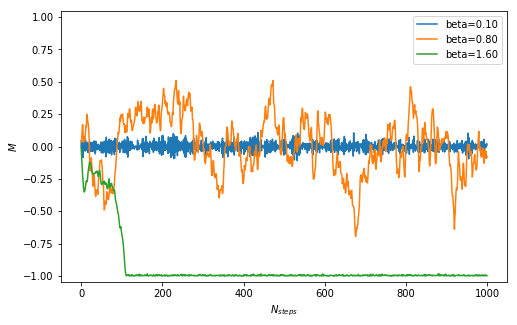

In [76]:
# for each value of beta=[0.1, 0.8, 1.6]
#    generate a grid of size=32, with the given value of beta
#    perform N=1000 red-black sweeps (each sweep runs over the full 32x32 grid)
#    calculate the mean magnetization, M for each sweep
#    Plot M as a function of sweep number.
#    You may want to use some of the plotting commands below.
betas = [0.1, 0.8, 1.6]
size = 32
grids = []
mags = []
tmp = []
for beta in betas:
    grids.append(Grid(size, beta))
for grid in grids:
    for i in range(1000):
        grid.sweep()
        tmp.append(grid.magnetisation(grid.cells))
    mags.append(tmp)
    tmp = []
# set-up the figure
print("Calculation finished")
fig, ax = plt.subplots(1,1, figsize = (8, 5))
file = "Thermalisation.pdf"
# caculate mag, the average magnetization, for N=1000 sweeps
# # YOUR CODE HERE
# raise NotImplementedError()
# plot the result, annotate the file, and save the file
ax.set_xlabel(r'$N_{steps}$')
ax.set_ylabel(r'$M$')
ax.set_ylim([-1.05, 1.05])
i = 0
for mag in mags:
    # pass the value of beta into the plot command to generate the label, as in
    ax.plot(np.arange(len(mag)), mag, label='beta=%.2f'%betas[i])
    i += 1
ax.legend()
plt.savefig(file)
fig.show()




#### 8. Ensemble-averaged magnetisation, $\bar M$, as a function of $\beta$

Once the system has thermalized (a good choice is $N_\mathrm{therm} =400$ thermalisation sweeps), measure the time-averaged magnetisation over 1000 sweeps. From this, estimate the ensemble-averaged magnetisation, $\bar M$. Plot $\bar M$ as a function of $1/\beta$ for $\beta = 1.6, 1.3, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.4, 0.1$. Include this plot in the PDF you hand in. Save the plot to a file 'Magnetisation.pdf'.


Perform the following steps:
 - for each of the listed values of beta:
 - create a $32\times32$ random grid
     - sweep the for N=400 initial 'thermalization' steps
     - **then** sweep for another 1000 steps, calculating $M$ after every sweep
     - use this to compute the ensemble-averaged magnitization, $\bar M$ for that value of $\beta$
 - plot $\bar M$ as a function of $\beta^{-1}$

**4 marks**


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


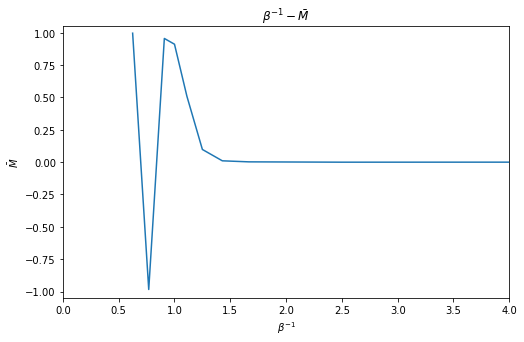

In [53]:
# Step 8: Magnetisation


# set-up the figure
file =  "Magnetisation.pdf"  
fig, ax = plt.subplots(1,1, figsize = (8, 5))

# the range of values of beta
size = 32
betas = [1.6,1.3,1.1,1.0,0.9,0.8,0.7,0.6,0.4,0.1]
mean_mags = []
# Loop over values of beta, computing the ensemble-averaged M for each beta
#    name the resulting ensemble-averaged M mean_mags
#    It is an array with the same dimension as betas
for beta in betas:
    grid = Grid(size, beta)
    mean_mags.append(np.mean(grid.do_sweeps(400, 1000)))
# YOUR CODE HERE

# make the plot
ax.set_xlabel(r'$\beta^{-1}$')
ax.set_ylabel(r'$\bar M$')
ax.set_ylim([-1.05, 1.05])
ax.set_xlim(0,4)
ax.set_title(r'$\beta^{-1}-\bar M$')
plt.plot(1./np.array(betas), mean_mags)
plt.savefig(file)
fig.show()


#### 9. Critical temperature

The critical temperature, $T_c$, in the mean field approximation, is given by
$$
T_c=\frac{h J}{2k_B},
$$
where h is the number of nearest-neighbours, as discussed in the lecture. Use this to calculate the critical value $\beta_c$ which corresponds to the critical temperature and mark it in the plot produced in step **8** (If you could not produce the plot in step **8** you may also mention the numerical value of $\beta_c$ on the solution you hand in).

Enter your answer in the box below. If you don't see a box, execute the hidden cell below.

**2 marks**

In [82]:
beta_crit=mywidgets.myFloatBox('Phasetransition','P1','beta_c=', 'Enter your analytically calculated value of beta_c to 3 sig figs')
beta_crit.getWidget()

#### 10. Mean field approximation

The ensemble-averaged value of the mean magnitization in the mean field approximation, is the solution of
$$
\bar M - \tanh\left( \frac{T_c\bar M}{T} \right) = 0\,,
$$
as discussed in the lecture. This equation can not be solved analytically for $\bar M$, for given
$T_c/T$.

Rewrite the equation in terms of $\beta$ using the relation between $T$ and $\beta$ derived before, and solve the resulting formula numerically for $\beta = 1.6, 1.3, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.4, 0.1$. You may want to use the root finding methods implemented in previous exercises. Redo the plot of step **8**, but on top of the numerical result, over plot the mean field approximation. Add a legend to the plot which allows to distinguish the solution obtained in step **8** from the mean field approximation.

The numerical value of $\bar M$ versus $\beta$ shows that the transition from $\bar M=0$ at hight $T$ to $\bar M>0$ at low $T$ is not infinitely sharp. To quantify where the transition occurs, it might be useful to compute
$\beta_{1/2}$, the value of $\beta$ where $\bar M=1/2$. Calculate this for both the numerical and mean field approximation, and indicate the point $(\beta,\bar M)=(\beta_{1/2}, 1/2)$ on the plot.

Save the plot as 'MeanField.pdf'


**4 marks**

In [77]:
# Implement the mean field calculation here: calculate mean_mag_MF, the mean field approximation to the magnetisation
# for a given value of beta. Also implement the calculation of the critical value, beta_c, according to the
# MFA

from scipy.optimize import fsolve
# YOUR CODE HERE
def solve_m(M, beta):
    return M - np.math.tanh(M * 2 * beta)

def solve_beta(beta, M):
    return M - np.math.tanh(M * 2 * beta)

betas = [1.6,1.3,1.1,1.0,0.9,0.8,0.7,0.6,0.4,0.1]
betas_tmp = []
for beta in betas:
    for i in range(3):
        betas_tmp.append(beta)
mean_mag_MF = []
for beta in betas:
    mean_mag_MF.append(fsolve(solve_m, 1, beta)[0])
    mean_mag_MF.append(fsolve(solve_m, 0, beta)[0])
    mean_mag_MF.append(fsolve(solve_m, -1, beta)[0])
beta_half = fsolve(solve_beta, 0, 0.5)[0]
T = 1 / beta_half
# raise NotImplementedError()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


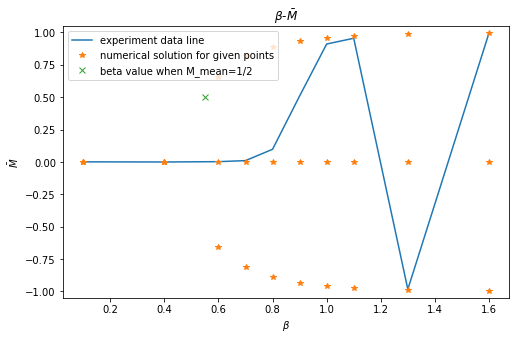

In [78]:
# YOUR CODE HERE
fig, ax = plt.subplots(1,1, figsize = (8, 5))
file =  "MeanField.pdf" 
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\bar M$')
ax.set_ylim([-1.05, 1.05])
plt.plot(np.array(betas), mean_mags, label="experiment data line")
plt.plot(np.array(betas_tmp), mean_mag_MF, '*', label="numerical solution for given points")
plt.plot(1/T, 0.5, 'x', label="beta value when M_mean=1/2")
plt.title(r'$\beta$-$\bar M$')
plt.legend()
plt.savefig(file)
fig.show()